# Name: Aayan Ahmed Khan
# Student ID: 31486347
# Part 2

In [102]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import random
import pandas as pd

# How states are represented:

There are 17 unique states. Each state has a unique state_number that is also a three digit integer. The base state is the number 100. If PlayerA scores, the next score is represented by the state_number that is equal to the previous state with a 1 added to the tens place. Similarly, if PlayerB scores, the next score is represented by the state_number that is equal to the previous state with a 1 added to the ones place. Finally we deal with the special cases of the deuce states (132, 123) by either setting the next state as a winning state if current_state is 132 and PlayerA scores or by subtracting a digit to set the next state as 122 if B scores. We also do the inverse if the current state is 123. Finally, for the final states (104, 140), since these are absorption states, we simply set the probability of the next state being themselves to 1

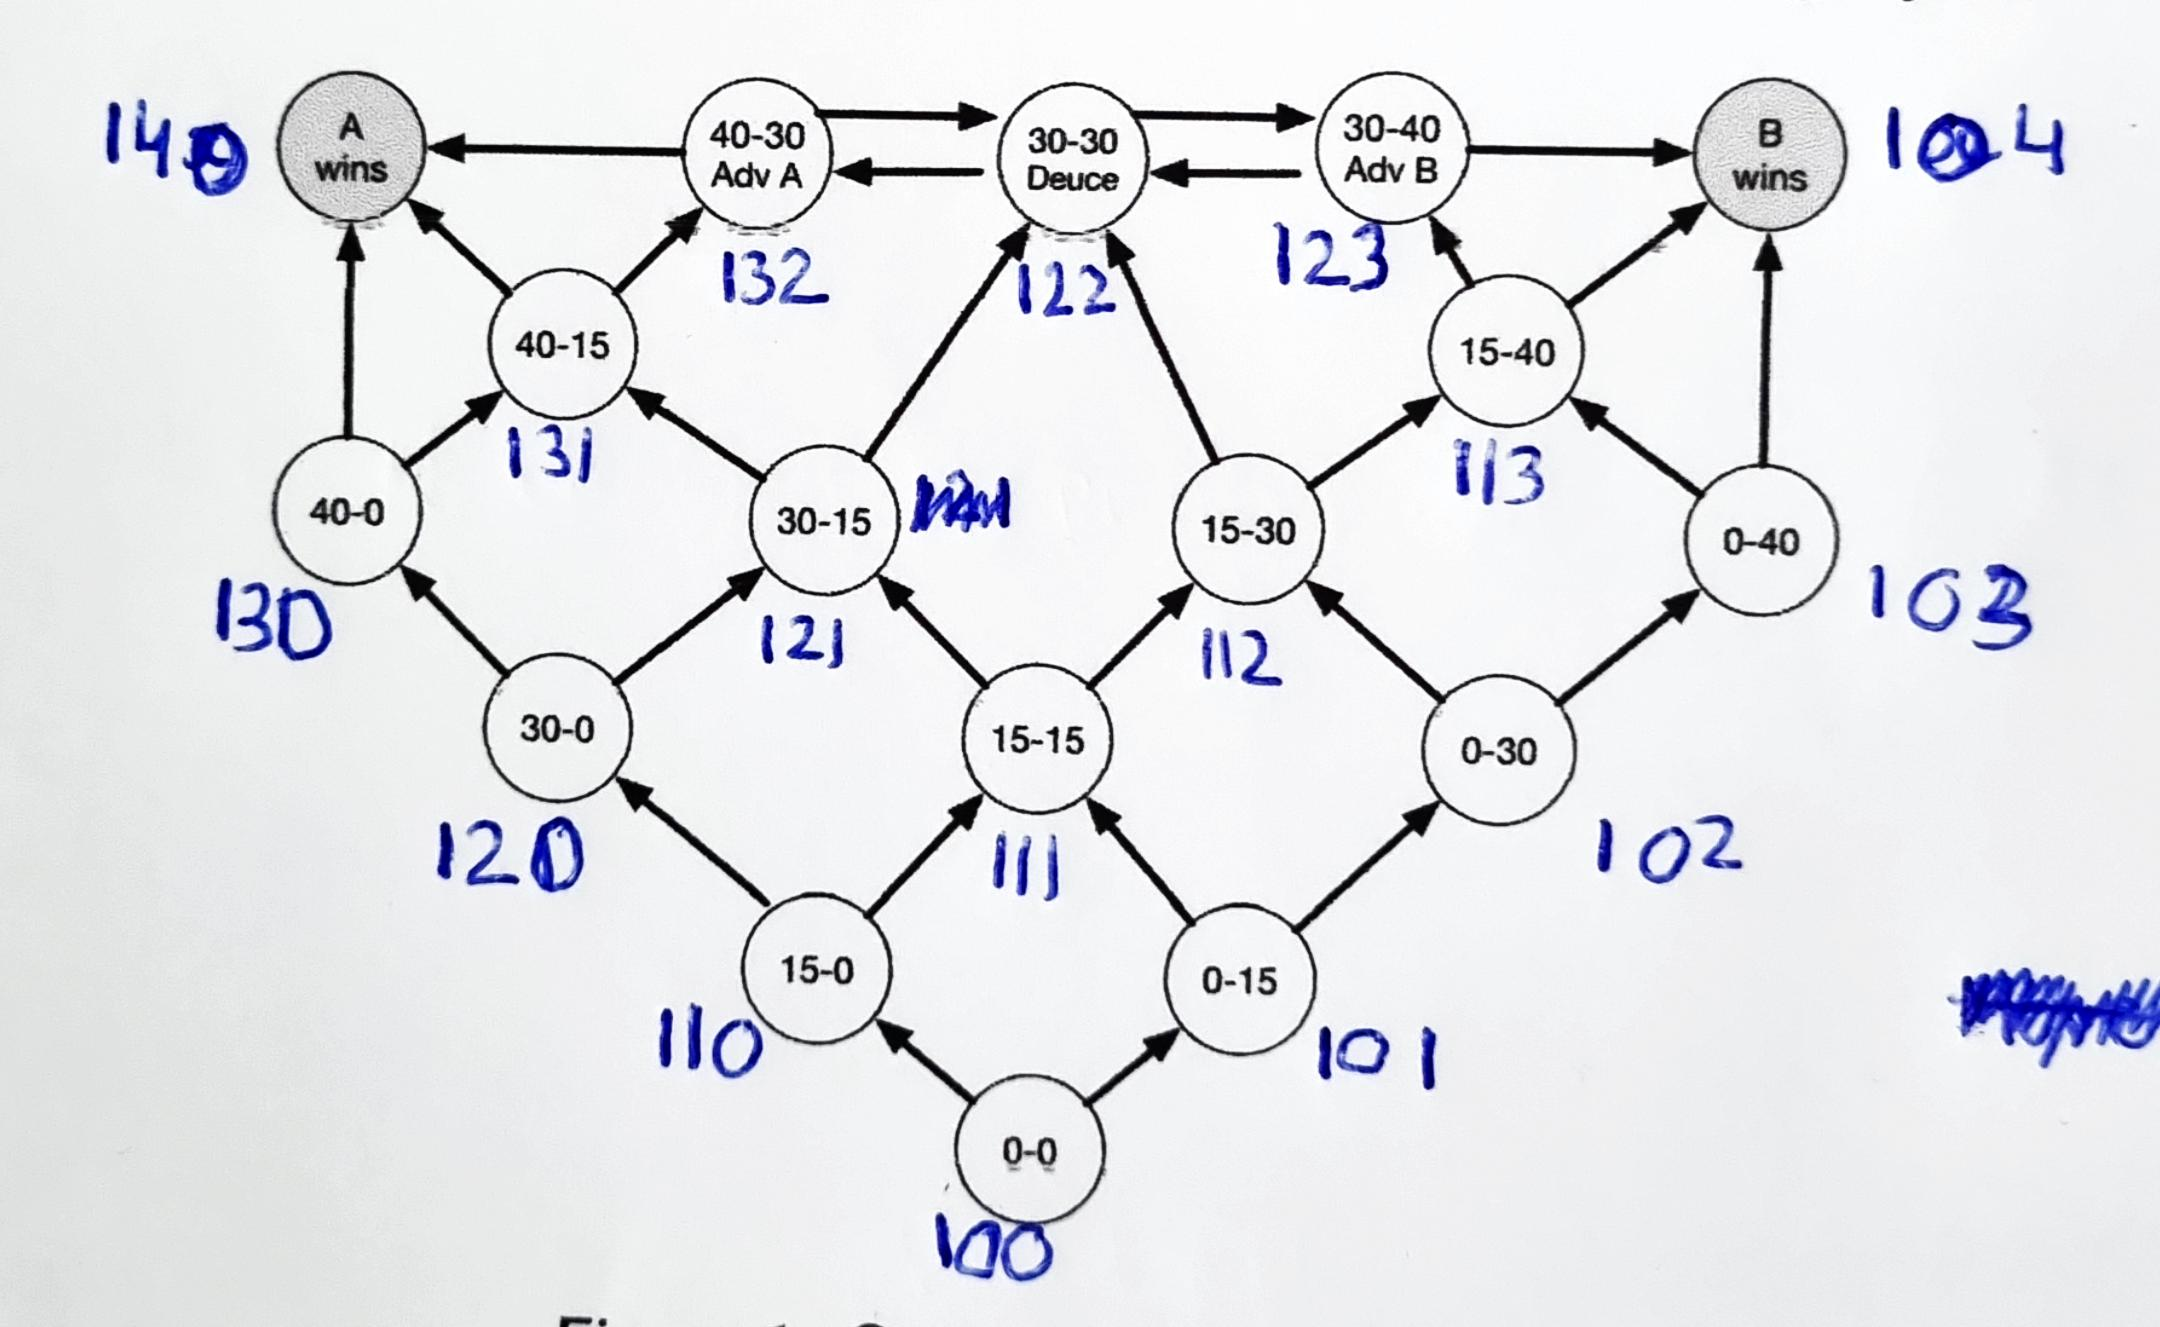

# 2.1

### helper functions

This helper function takes in as input a state and a scorer and returns the next state depending on whether A scored or B scored

In [103]:
def get_next_state(current_state, scorer):
    
    #if A scores
    if scorer == "A":
        
        #if A is one point away from winning, return state representing playerA won
        if ((current_state//10) % 10) == 3:
            return 140
        
        #special case for deuce state
        elif current_state == 123:
            return 122
        
        #else next state is simply current_state increased by one in the tens place
        else:
            return current_state + 10
        
    elif scorer == "B":
        
        #if B is one point away from winning, return state representing playerB won
        if (current_state % 10) == 3:
            return 104
        
        #special case for deuce state
        elif current_state == 132:
            return 122
        
        #else next state is simply current_state increased by one in the ones place
        else:
            return current_state + 1
    

## Actual Function to generate transition matrix

I created the transition matrix by first manually creating all the unqiue states in our system and then labelling some as deuce_states and labelling some as final_states. Then I created a matrix of zeros to use as a basis for creating the transition matrix. I iterated through each state, and calculated the next states if PlayerA or PlayerB scored and I assigned these the probability of p and 1-p respectively. For the final states, I input a probability of 1 to themselves as these states are absorbing states. For the deuce_state of State 132 which represents 40-30 Adv A, I input probability p of PlayerA scoring and winning the game and going to State 104 (playerA win) whereas I input probability 1-p of PlayerB scoring and taking the system to State 122 which represents a 30-30 deuce as shown in the diagram on top. I then did the opposite for the deuce state of State 123 which represents 30-40 Adv B.

In [104]:
def tennis_game_transition_matrix(probability_p= "p"):
    
    #if p is string, q is also string, else if p is a probability, so is q
    if type(probability_p) == str:
        q = "q"
    else:
        q = 1-probability_p
    
    #unique names of each state (as shown in photo above), 140 means that playerA won, 104 means playerB won
    states = [100, 101, 102, 103, 110, 120, 130, 111, 112, 121, 113, 131, 123, 122, 132, 104, 140]
    
    deuce_states = [123, 132]
    
    final_states = [104, 140]
    
    #since we have 17 states, we create a 17x17 matrix of zeros
    transition_matrix = np.zeros(shape=(17,17))
    
    #we use a pandas dataframe to store the transition matrix in order to have our custom row and column names
    df_transition_matrix = pd.DataFrame(transition_matrix, columns=states, index=states)
    
    #from each state, either A scores (increase of 1 in the tens places)
    #or B scores (increase of 1 in the ones places)
    for state in states:
        
        #if we have a non-final state, special case of deuce states is handled within get_next_state() function
        if state not in final_states:
            
            #calculate the next states from current state
            state_if_A_scores = get_next_state(state, "A")
            state_if_B_scores = get_next_state(state, "B")
            
            #set probability of going to either state
            df_transition_matrix.loc[state, state_if_A_scores] = probability_p
            df_transition_matrix.loc[state, state_if_B_scores] = q
            
        #if state is one of two final states
        elif state in final_states:
            df_transition_matrix.loc[state, state] = 1
            
    return df_transition_matrix

## Explicitly stated Transition Matrix

Here is the transition_matrix, the letter p represents the probability that PlayerA wins any single point. Whereas q is the probability that PlayerB wins any single point. We use pandas as it allows us to set custom indices for the rows and columns, however, these pandas dataframes can be easily converted to numpy matrices using the df.to_numpy() function which allow for matrix calculations. We can input an actual number for probability_p to get a proper transition matrix

In [199]:
df_transition_matrix = tennis_game_transition_matrix(probability_p= "p")
df_transition_matrix

,100,101,102,103,110,120,130,111,112,121,113,131,123,122,132,104,140
100,0.0,q,0,0,p,0,0,0,0,0,0,0,0,0,0,0,0
101,0.0,0,q,0,0,0,0,p,0,0,0,0,0,0,0,0,0
102,0.0,0,0,q,0,0,0,0,p,0,0,0,0,0,0,0,0
103,0.0,0,0,0,0,0,0,0,0,0,p,0,0,0,0,q,0
110,0.0,0,0,0,0,p,0,q,0,0,0,0,0,0,0,0,0
120,0.0,0,0,0,0,0,p,0,0,q,0,0,0,0,0,0,0
130,0.0,0,0,0,0,0,0,0,0,0,0,q,0,0,0,0,p
111,0.0,0,0,0,0,0,0,0,q,p,0,0,0,0,0,0,0
112,0.0,0,0,0,0,0,0,0,0,0,q,0,0,p,0,0,0
121,0.0,0,0,0,0,0,0,0,0,0,0,p,0,q,0,0,0


In [200]:
df_transition_matrix = tennis_game_transition_matrix(probability_p= 0.6)
df_transition_matrix

,100,101,102,103,110,120,130,111,112,121,113,131,123,122,132,104,140
100,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.4,0.0
110,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,0.0


## Explicitly stated Initial Distribution

The initial distribution simply starts of in state 100 where both players have 0 points scored

In [116]:
initial_distribution = np.zeros(17)
initial_distribution[0] = 1
initial_distribution

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 2.2

### Helper Function to generate canonical form of a transition matrix

The states were re-ordered using the pandas.reindex() function. The three digit numbers represent the same states as shown in the original diagram.

In [214]:
def get_canonical_form(transition_matrix):
    
    #get all our states
    states = list(df_transition_matrix.columns)
    
    #extract all transient_states
    transient_states = []
    
    #extract all absorbing states
    absorbing_states = []
    
    for state in states:
        if transition_matrix.loc[state, state] == 1:
            absorbing_states.append(state)
            
        else:
            transient_states.append(state)
            
    
    #get new ordering where transition states are first
    new_ordering = transient_states + absorbing_states

    #swap columns to make all the transient columns first
    canonical_form = transition_matrix.reindex(columns=new_ordering)
    
    #swap rows to make all the transient rows first
    canonical_form = canonical_form.reindex(index=new_ordering)
    
    return canonical_form

## Explicitly stated canonical form

The canonical form of our transition_matrix is the exact same as the original transition_matrix as it was already in canonical form. 

In [206]:
get_canonical_form(df_transition_matrix)

,100,101,102,103,110,120,130,111,112,121,113,131,123,122,132,104,140
100,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.4,0.0
110,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.4,0.0,0.0,0.0


# 2.3

## Table showing probability of A winning for p = (0.5, 0.8]

### Helper functions to calculate fundamental_matrix and matrix R from the canonical form

In [213]:
def get_Q_and_R_canonical(transition_matrix):
    #get all our states
    states = list(df_transition_matrix.columns)
    
    #extract all transient_states
    transient_states = []
    
    #extract all absorbing states
    absorbing_states = []
    
    for state in states:
        if transition_matrix.loc[state, state] == 1:
            absorbing_states.append(state)
            
        else:
            transient_states.append(state)
            
    
    #get new ordering where transition states are first
    new_ordering = transient_states + absorbing_states

    #get matrix Q
    Q = transition_matrix.loc[transient_states, transient_states]
    
    #get matrix R
    R = transition_matrix.loc[transient_states, absorbing_states]
    
    
    return Q, R

#using the estimation method
def get_fundamental_matrix(transition_matrix, iterations = 100):
    
    #extract all transient_states
    transient_states = []
    
    #extract all absorbing states
    absorbing_states = []
    
    for state in states:
        if transition_matrix.loc[state, state] == 1:
            absorbing_states.append(state)
            
        else:
            transient_states.append(state)
    
    #get canonical form's Q matrix
    Q, R = get_Q_and_R_canonical(transition_matrix)
    
    #convert Q from a pandas df to a numpu matrix
    Q = Q.to_numpy()
    res = np.identity(len(Q))
    
    Q_power_n = Q
    
    #estimate fundamental matrix
    for i in range(iterations):
        res = res + Q_power_n
        Q_power_n = np.dot(Q_power_n, Q)
        
    res = pd.DataFrame(res, columns=transient_states, index=transient_states)
    
    return res
    

## Actual function to get probability of A winning for different probability_p of A winning any single point

To solve this I first got the transition_matrix for corresponding value of p. Then I got the fundamental matrix N by using the estimation method. Then I got the R matrix from the canonical form of the transition matrix. Finally, I got the matrix B = NR and then got the entry corresponding from state 0 (start game) to state 104 (PlayerA win) to get the probability of the absorbing chain being absorbed in state 104 if it starts in transient state 100

In [207]:
def generate_probability_A_winning(p_from_exclusive, p_to_inclusive, increments = 0.05):
    
    #store results in res
    res = []
    
    #probability of PlayerA winning is generated by getting the entry from row 100, column 104
    #from the matrix B = NR where N is the fundamental matrix and R is the R matrix from a canonical matrix
    
    probability_p = p_from_exclusive + increments
    
    while probability_p <= p_to_inclusive:
        
        #get transition matrix
        transition_matrix = tennis_game_transition_matrix(probability_p)
        
        #get fundamental matrix N
        fundamental_matrix = get_fundamental_matrix(transition_matrix, iterations = 100)
        
        #get matrix R from canonical form
        Q, R = get_Q_and_R_canonical(transition_matrix)
        
        #calculate matrix B = NR
        #first convert Q to a numpy matrix
        R = R.to_numpy()
        
        B = np.dot(fundamental_matrix, R)

        #state 140 represents PlayerA win and is at B[0, 1]
        res.append([probability_p, B[0, 1]])
        
        probability_p += increments
        
        #round probability_p to avoid floating point errors caused due to adding to small float numbers
        probability_p = round(probability_p, 3)
        
    
    #turn final results in into a pandas dataframe so we can have custom column names
    res = pd.DataFrame(res, columns=["p", "Pr(PlayerA Wins)"])
        
    return res

In [208]:
table_probability = generate_probability_A_winning(p_from_exclusive=0.5, p_to_inclusive=0.8, increments = 0.025)
table_probability

,p,Pr(PlayerA Wins)
0,0.525,0.562266
1,0.550,0.623149
2,0.575,0.681348
3,0.600,0.735729
4,0.625,0.785379
5,0.650,0.829645
6,0.675,0.868150
7,0.700,0.900789
8,0.725,0.927697
9,0.750,0.949219


### Plot of p vs Probability of PlayerA winning

In the plot, we can clearly see that increments in p near 0.50 result in significantly higher increases in probability of PlayerA winning compared to the increments in p near 0.9

Text(0, 0.5, 'Probability of PlayerA Winning')

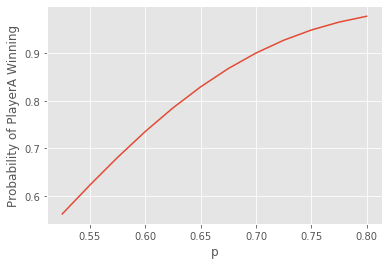

In [212]:
plt.plot(table_probability["p"], table_probability["Pr(PlayerA Wins)"])
plt.xlabel("p")
plt.ylabel("Probability of PlayerA Winning")

# 2.4

To solve this I first got the transition_matrix for corresponding value of p. Then I got the fundamental matrix N by using the estimation method. This fundamental matrix's ij entry represents the expected number of times the chain visits state j, starting in state i. Since visiting each state from another state represents a difference of one point, to get the expected number of points before absorption I simply sum the first row in N which represents expected time AND expected points before absorption starting in State 100 (game start).

## Table Showing Expected Number Of Points In A Game for p = (0.5, 0.8]

In [230]:
def generate_expected_points(p_from_exclusive, p_to_inclusive, increments = 0.05):
    
    #store results in res
    res = []
    
    #probability of PlayerA winning is generated by getting the entry from row 100, column 104
    #from the matrix B = NR where N is the fundamental matrix and R is the R matrix from a canonical matrix
    
    probability_p = p_from_exclusive + increments
    
    while probability_p <= p_to_inclusive:
        
        #get transition matrix
        transition_matrix = tennis_game_transition_matrix(probability_p)
        
        #get fundamental matrix N
        fundamental_matrix = get_fundamental_matrix(transition_matrix, iterations = 100)
        
        #get sum of first row of fundamental matrix to get expected points
        expected_points = sum(fundamental_matrix.to_numpy()[0])

        #append results to res
        res.append([probability_p, expected_points])
        
        probability_p += increments
        
        #round probability_p to avoid floating point errors caused due to adding to small float numbers
        probability_p = round(probability_p, 3)
        
    
    #turn final results in into a pandas dataframe so we can have custom column names
    res = pd.DataFrame(res, columns=["p", "Expected Points"])
        
    return res

In [237]:
table_expected = generate_expected_points(p_from_exclusive=0.5, p_to_inclusive=0.8, increments = 0.025)
table_expected

,p,Expected Points
0,0.525,6.732558
1,0.550,6.680915
2,0.575,6.597071
3,0.600,6.484185
4,0.625,6.346335
5,0.650,6.188237
6,0.675,6.014931
7,0.700,5.831490
8,0.725,5.642754
9,0.750,5.453125


### Plot of p vs Expected Number Of Points

In the plot, we can clearly see that the expected number of points decreases as p increases as PlayerA becomes more and more likely to win points and winning the game quicker thus leading to less expected points. This expected number of points approaches 4 as p approaches 1

Text(0, 0.5, 'Expected Points')

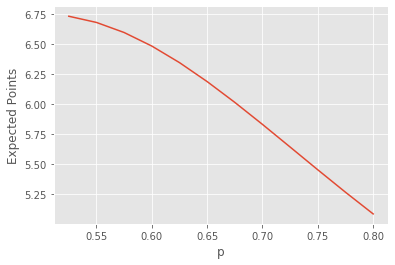

In [238]:
plt.plot(table_expected["p"], table_expected["Expected Points"])
plt.xlabel("p")
plt.ylabel("Expected Points")